<a href="https://colab.research.google.com/github/anandgaurav2011/pyspark-colab/blob/main/pyspark_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 20.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=fd917906513774f8a7e6ed551754c492f0d0039a10dd25c79c82b6b681006f20
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
import pyspark

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.master('local[4]').appName('ml').getOrCreate()

In [ ]:
df = spark.read.csv("/content/drive/MyDrive/sample_data/diabetes.csv",header=True,inferSchema=True)

In [ ]:
df

DataFrame[Pregnancies: int, Glucose: int, BloodPressure: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int]

In [ ]:
df.columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [ ]:
df.count()

768

In [ ]:
df.head(5)

[Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1),
 Row(Pregnancies=1, Glucose=85, BloodPressure=66, SkinThickness=29, Insulin=0, BMI=26.6, DiabetesPedigreeFunction=0.351, Age=31, Outcome=0),
 Row(Pregnancies=8, Glucose=183, BloodPressure=64, SkinThickness=0, Insulin=0, BMI=23.3, DiabetesPedigreeFunction=0.672, Age=32, Outcome=1),
 Row(Pregnancies=1, Glucose=89, BloodPressure=66, SkinThickness=23, Insulin=94, BMI=28.1, DiabetesPedigreeFunction=0.167, Age=21, Outcome=0),
 Row(Pregnancies=0, Glucose=137, BloodPressure=40, SkinThickness=35, Insulin=168, BMI=43.1, DiabetesPedigreeFunction=2.288, Age=33, Outcome=1)]

In [ ]:
df.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [ ]:
df.summary().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [ ]:
pdf = df.toPandas()

In [ ]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int32  
 1   Glucose                   768 non-null    int32  
 2   BloodPressure             768 non-null    int32  
 3   SkinThickness             768 non-null    int32  
 4   Insulin                   768 non-null    int32  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int32  
 8   Outcome                   768 non-null    int32  
dtypes: float64(2), int32(7)
memory usage: 33.1 KB


In [ ]:
df.groupby('outcome').count().show()

+-------+-----+
|outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [ ]:
pdf['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

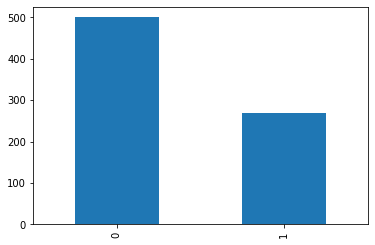

In [ ]:
pdf['Outcome'].value_counts().plot.bar()

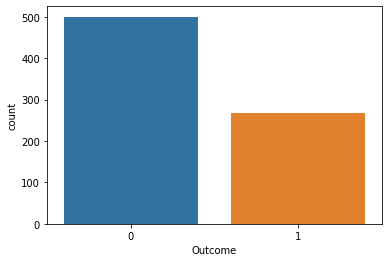

In [ ]:
import seaborn as sns
sns.countplot(x=pdf['Outcome'])

In [ ]:
round(pdf['Outcome'].value_counts()[0]/len(pdf),2)*100

65.0

In [ ]:
round(pdf['Outcome'].value_counts()[1]/len(pdf),2)*100

35.0

In [ ]:
pdf.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
from pyspark.sql.functions import isnull, when, count, col

In [ ]:
# no missing values
df.select([count(when(isnull(c),c)).alias(c) for c in df.columns]).show()

+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|          0|      0|            0|            0|      0|  0|                       0|  0|      0|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+



In [ ]:
# Assemble the features
required_features = ['Glucose','BloodPressure','BMI','Age']

In [ ]:
pdf[required_features]

,Glucose,BloodPressure,BMI,Age
0,148,72,33.6,50
1,85,66,26.6,31
2,183,64,23.3,32
3,89,66,28.1,21
4,137,40,43.1,33
...,...,...,...,...
763,101,76,32.9,63
764,122,70,36.8,27
765,121,72,26.2,30
766,126,60,30.1,47


In [ ]:
# import the vector assembler clas
from pyspark.ml.feature import VectorAssembler

In [ ]:
# create the object
assembler = VectorAssembler(inputCols=required_features,outputCol='features')

In [ ]:
transformed_data = assembler.transform(df)

In [ ]:
transformed_data.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|            features|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|[148.0,72.0,33.6,...|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|[85.0,66.0,26.6,3...|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|[183.0,64.0,23.3,...|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|[89.0,66.0,28.1,2...|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|[137.0,40.0,43.1,...|
+-----------+-------+-----------

In [ ]:
# split the data in train & test
training_data, test_data = transformed_data.randomSplit([0.75, 0.25], seed = 0)

In [ ]:
training_data.count()

573

In [ ]:
test_data.count()

195

In [ ]:
training_data.groupby('Outcome').count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  190|
|      0|  383|
+-------+-----+



In [ ]:
test_data.groupby('Outcome').count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|   78|
|      0|  117|
+-------+-----+



In [ ]:
training_data.groupby('Outcome').count().select('count').show()

+-----+
|count|
+-----+
|  190|
|  383|
+-----+



In [ ]:
test_data.groupby('Outcome').count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|   78|
|      0|  117|
+-------+-----+



In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

In [ ]:
df = DecisionTreeClassifier(labelCol='Outcome',featuresCol='features')

In [ ]:
# train the model
model = df.fit(training_data)

In [ ]:
# predictions on unseen data
predictions = model.transform(test_data)

In [ ]:
predictions.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+-------------+--------------------+----------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|            features|rawPrediction|         probability|prediction|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+-------------+--------------------+----------+
|          0|     57|           60|            0|      0|21.7|                   0.735| 67|      0|[57.0,60.0,21.7,6...|  [65.0,16.0]|[0.80246913580246...|       0.0|
|          0|     99|            0|            0|      0|25.0|                   0.253| 22|      0|[99.0,0.0,25.0,22.0]|  [117.0,1.0]|[0.99152542372881...|       0.0|
|          0|    100|           70|           26|     50|30.8|                   0.597| 21|      0|[100.0,70.0,30.8,...|  [117.0,1.0]|[0.99152542372881...|       0.0

In [ ]:
pdf1 = predictions.select('prediction').toPandas()

In [ ]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

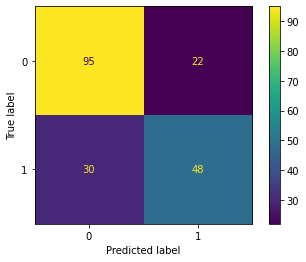

In [ ]:
pred = predictions.select('prediction').toPandas()
actual = test_data.select('Outcome').toPandas()

ConfusionMatrixDisplay.from_predictions(actual, pred)

In [ ]:
accuracy_score(actual, pred)

0.7333333333333333

In [ ]:
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       117
           1       0.69      0.62      0.65        78

    accuracy                           0.73       195
   macro avg       0.72      0.71      0.72       195
weighted avg       0.73      0.73      0.73       195



In [ ]:
# import the evaluation class
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
eval = MulticlassClassificationEvaluator(labelCol='Outcome',metricName='accuracy')

In [ ]:
print("Accuracy:", eval.evaluate(predictions))

Accuracy: 0.7333333333333333
